#Task : 1
#TITANIC SURVIVAL PREDICTION

* Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

* The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

#Exploration Data Analysis (EDA)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

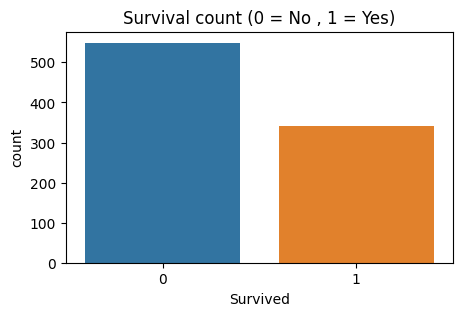

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival count (0 = No , 1 = Yes)')
plt.show()

In [ ]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [ ]:
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female     81  233
male      468  109


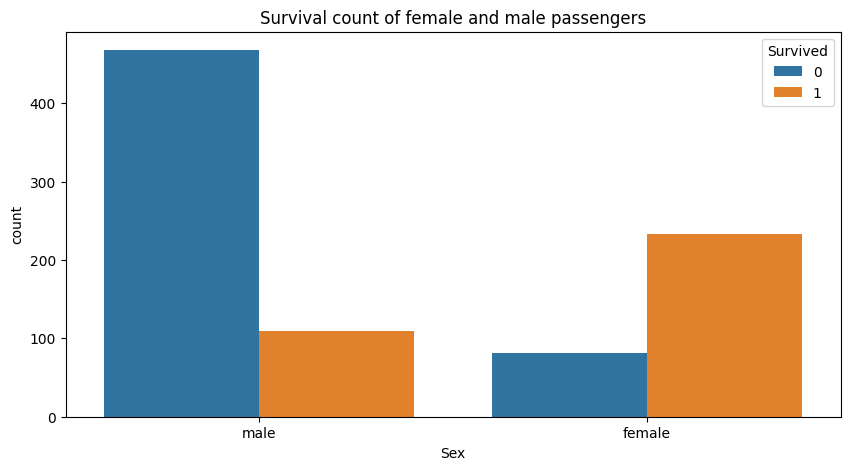

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival count of female and male passengers')
plt.show()

In [ ]:
age_survived = pd.crosstab(df['Age'], df['Survived'])
print(age_survived)

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[89 rows x 2 columns]


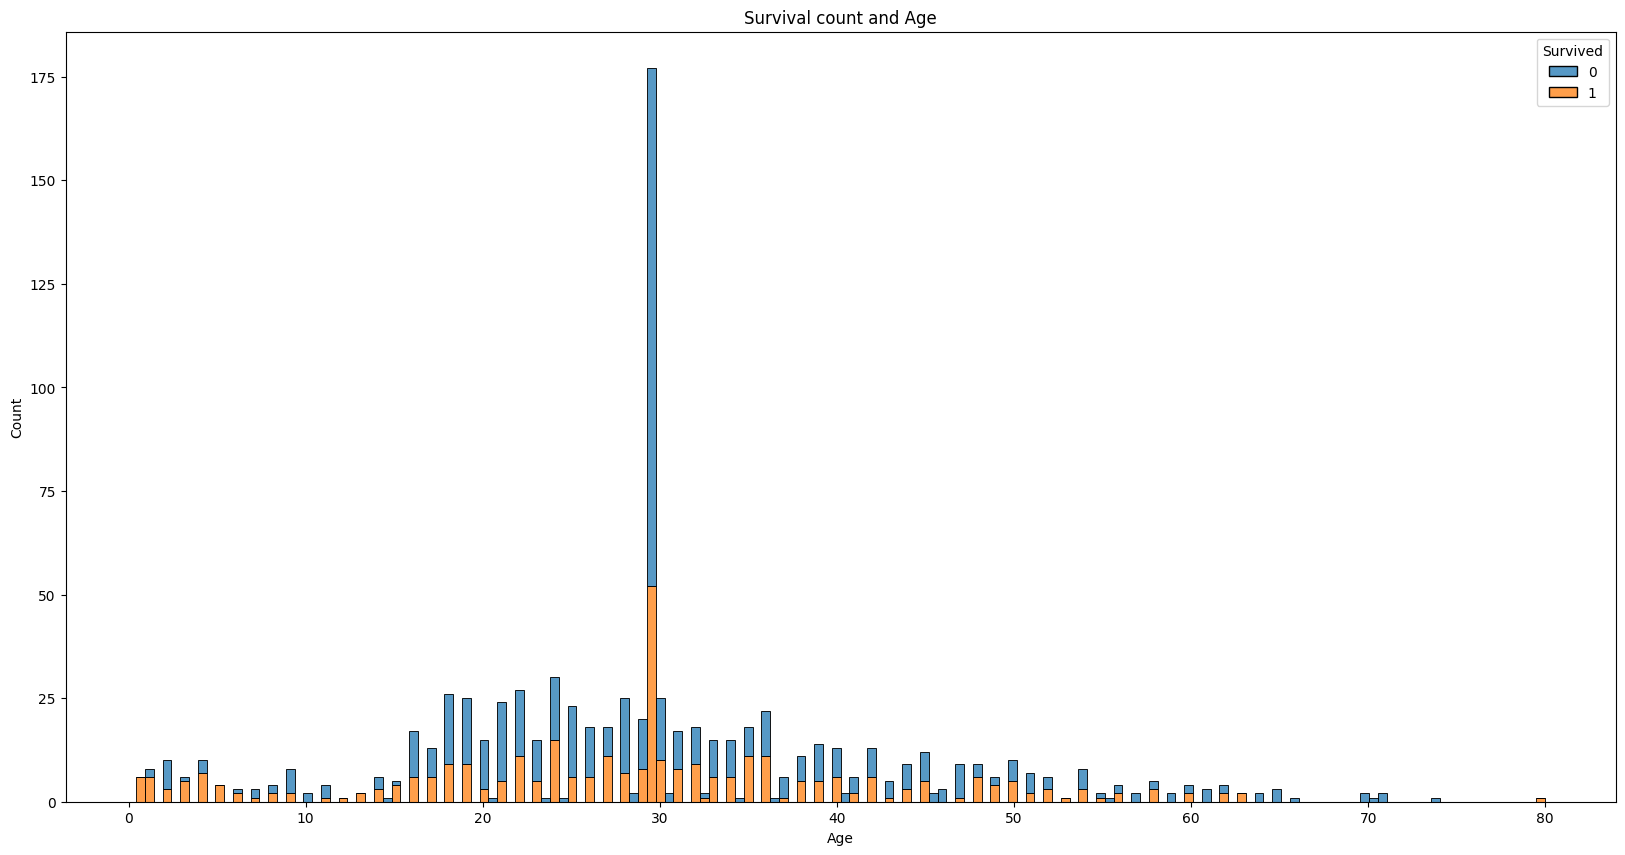

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Survived', bins=160, multiple='stack', ax=ax)
plt.title('Survival count and Age')
plt.show()

In [ ]:
df_col = df[["Survived","Sex","Age","Fare","Cabin","Embarked"]]
df_col

,Survived,Sex,Age,Fare,Cabin,Embarked
0,0,male,22.000000,7.2500,NaN,S
1,1,female,38.000000,71.2833,C85,C
2,1,female,26.000000,7.9250,NaN,S
3,1,female,35.000000,53.1000,C123,S
4,0,male,35.000000,8.0500,NaN,S
...,...,...,...,...,...,...
886,0,male,27.000000,13.0000,NaN,S
887,1,female,19.000000,30.0000,B42,S
888,0,female,29.699118,23.4500,NaN,S
889,1,male,26.000000,30.0000,C148,C


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
df_col['Embarked'] = lb1.fit_transform(df_col['Embarked'])
lb2 = LabelEncoder()
df_col['Sex'] = lb2.fit_transform(df_col['Sex'])
lb3 = LabelEncoder()
df_col['Cabin'] = lb3.fit_transform(df_col['Cabin'])
df_col

<ipython-input-17-12b31c5ea29e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Embarked'] = lb1.fit_transform(df_col['Embarked'])
<ipython-input-17-12b31c5ea29e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Sex'] = lb2.fit_transform(df_col['Sex'])
<ipython-input-17-12b31c5ea29e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Survived,Sex,Age,Fare,Cabin,Embarked
0,0,1,22.000000,7.2500,147,2
1,1,0,38.000000,71.2833,81,0
2,1,0,26.000000,7.9250,147,2
3,1,0,35.000000,53.1000,55,2
4,0,1,35.000000,8.0500,147,2
...,...,...,...,...,...,...
886,0,1,27.000000,13.0000,147,2
887,1,0,19.000000,30.0000,30,2
888,0,0,29.699118,23.4500,147,2
889,1,1,26.000000,30.0000,60,0


In [ ]:
df_col.isnull().sum()

Survived    0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
df_col.describe()

,Survived,Sex,Age,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.699118,32.204208,130.744108,1.538721
std,0.486592,0.477990,13.002015,49.693429,36.024237,0.794231
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,7.910400,147.000000,1.000000
50%,0.000000,1.000000,29.699118,14.454200,147.000000,2.000000
75%,1.000000,1.000000,35.000000,31.000000,147.000000,2.000000
max,1.000000,1.000000,80.000000,512.329200,147.000000,3.000000


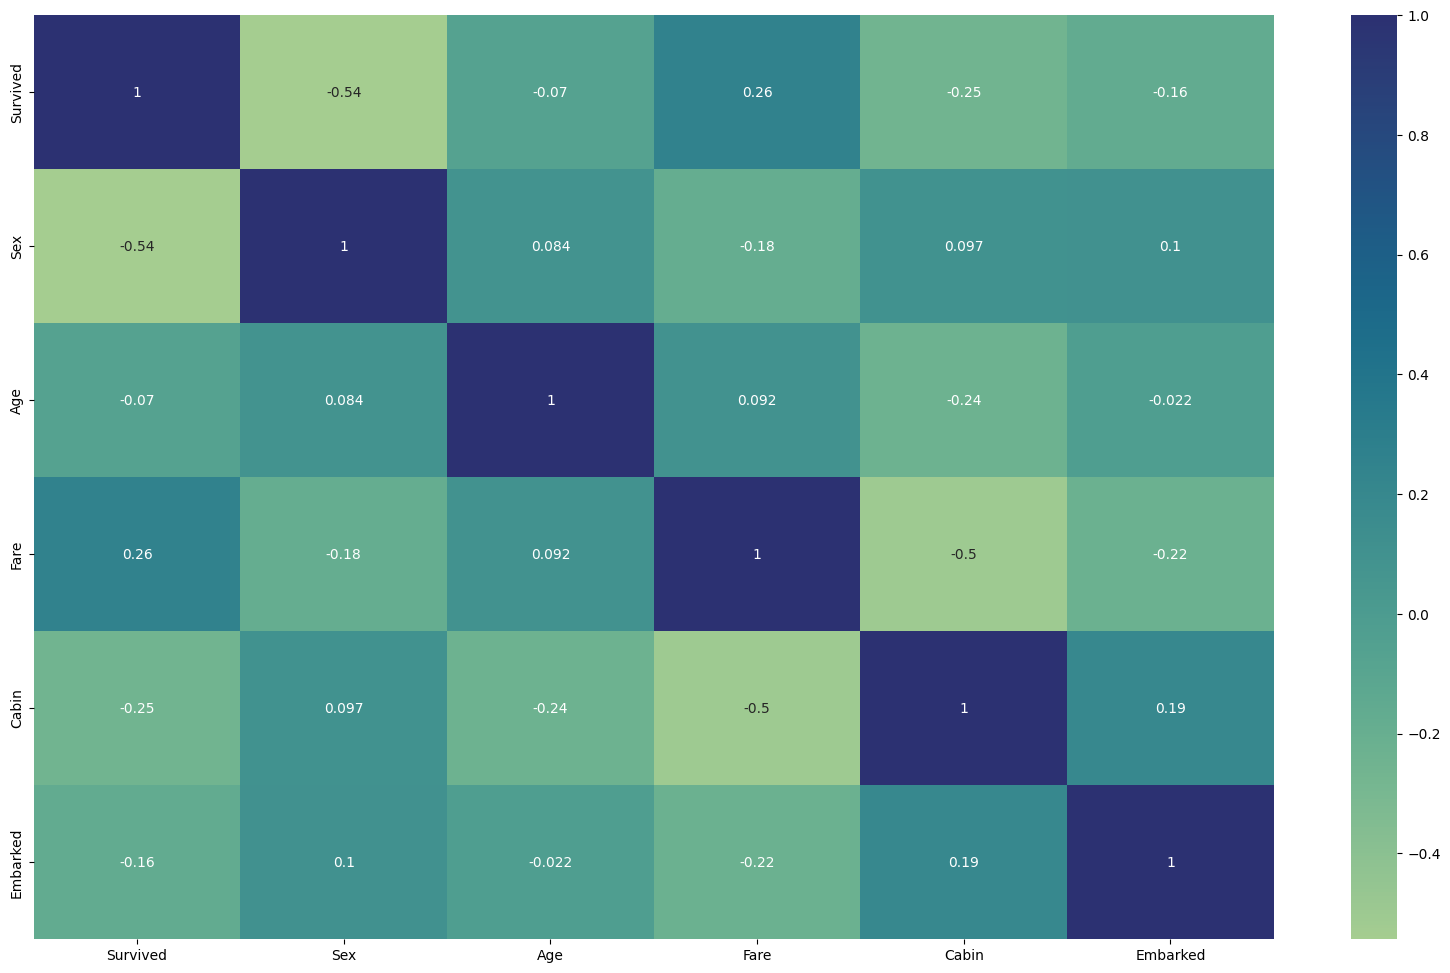

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df_col.corr(), cmap = 'crest', annot = True)
plt.show()

#Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
x = df_col.drop(['Survived','Cabin','Fare'],axis = 1)
y = df_col.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


#Apply KNN Classification Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = []
for neighbors in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors = neighbors)
    knn_model.fit(x_train, y_train)

    knn_pred = knn_model.predict(x_test)
    accuracy.append(accuracy_score(y_test, knn_pred))
    print(f'Number of neighbors = {neighbors} \tAccuracy = {accuracy[neighbors-1]*100:.2f} %')

Number of neighbors = 1 	Accuracy = 96.09 %
Number of neighbors = 2 	Accuracy = 96.65 %
Number of neighbors = 3 	Accuracy = 96.09 %
Number of neighbors = 4 	Accuracy = 96.09 %
Number of neighbors = 5 	Accuracy = 92.18 %
Number of neighbors = 6 	Accuracy = 94.41 %
Number of neighbors = 7 	Accuracy = 92.74 %
Number of neighbors = 8 	Accuracy = 93.85 %
Number of neighbors = 9 	Accuracy = 94.41 %
Number of neighbors = 10 	Accuracy = 93.30 %
Number of neighbors = 11 	Accuracy = 92.18 %
Number of neighbors = 12 	Accuracy = 91.06 %
Number of neighbors = 13 	Accuracy = 88.27 %
Number of neighbors = 14 	Accuracy = 88.83 %
Number of neighbors = 15 	Accuracy = 84.92 %
Number of neighbors = 16 	Accuracy = 88.27 %
Number of neighbors = 17 	Accuracy = 86.03 %
Number of neighbors = 18 	Accuracy = 86.03 %
Number of neighbors = 19 	Accuracy = 84.92 %
Number of neighbors = 20 	Accuracy = 86.59 %
Number of neighbors = 21 	Accuracy = 86.03 %
Number of neighbors = 22 	Accuracy = 86.59 %
Number of neighbors

In [ ]:
clf1_knn = KNeighborsClassifier(n_neighbors = 18,p=1)

In [ ]:
print(x_train)

     Sex        Age  Embarked
331    1  45.500000         2
733    1  23.000000         2
382    1  32.000000         2
704    1  26.000000         2
813    0   6.000000         2
..   ...        ...       ...
106    0  21.000000         2
270    1  29.699118         2
860    1  41.000000         2
435    0  14.000000         2
102    1  21.000000         2

[712 rows x 3 columns]


In [ ]:
clf1_knn.fit (x_train,y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

In [ ]:
pred1 = clf1_knn.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test,pred1)

In [ ]:
print(cm1)

[[ 58  11]
 [  0 110]]


In [ ]:
cl1 = classification_report(y_test,pred1)

In [ ]:
print(cl1)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        69
           1       0.91      1.00      0.95       110

    accuracy                           0.94       179
   macro avg       0.95      0.92      0.93       179
weighted avg       0.94      0.94      0.94       179



#Apply Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
clf2_LR = LogisticRegression(solver='liblinear', max_iter=200)

In [ ]:
clf2_LR.fit (x_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_pred = clf2_LR.predict(x_test)

In [ ]:
LR_Acc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LR_Acc*100))

Logistic regression accuracy: 100.00%
